<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/hpdp/ANGKASA/Tool%202%20-%20tsfresh/Ass5_tsfresh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kuehlepat","key":"7ee486a700d538616b32985b859db53e"}'}

###Loading the dataset

In [3]:
pip install kaggle

In [4]:
mkdir ~/.kaggle

In [5]:
cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset

 44% 5.00M/11.3M [00:00<00:00, 29.7MB/s]
100% 11.3M/11.3M [00:00<00:00, 60.1MB/s]


In [8]:
! unzip usa-real-estate-dataset.zip

Archive:  usa-real-estate-dataset.zip
  inflating: realtor-data.zip.csv    


In [11]:
df = pd.read_csv('realtor-data.csv')

In [12]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


###Exploratory Data Analysis (EDA)

In [13]:
# Check for missing values
df.isnull().sum()

status                 0
bed               140531
bath              122850
acre_lot          295046
city                  75
state                  0
zip_code             205
house_size        323284
prev_sold_date    499099
price                 71
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
# Get data types of each column
df.dtypes

status             object
bed               float64
bath              float64
acre_lot          float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
price             float64
dtype: object

In [16]:
# Assuming 'your_column' is the column you want to convert
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'])

In [17]:
# Display summary statistics
df.describe(include="all")

<ipython-input-17-7cf6630339fc>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
count,261055,261055.000000,261055.000000,261055.000000,261055,261055,261055.000000,261055.000000,261055,2.610550e+05
unique,1,NaN,NaN,NaN,1861,12,NaN,NaN,9038,NaN
top,for_sale,NaN,NaN,NaN,Boston,New York,NaN,NaN,2004-07-09 00:00:00,NaN
freq,261055,NaN,NaN,NaN,6822,56576,NaN,NaN,208,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-01 00:00:00,NaN
mean,NaN,3.693773,2.700645,4.536097,NaN,NaN,7059.708215,2377.849235,NaN,7.890336e+05
std,NaN,1.533037,1.505262,192.803363,NaN,NaN,4134.625948,2121.903973,NaN,1.440643e+06
min,NaN,1.000000,1.000000,0.000000,NaN,NaN,802.000000,170.000000,NaN,1.000000e+04
25%,NaN,3.000000,2.000000,0.110000,NaN,NaN,3037.000000,1344.000000,NaN,2.999000e+05


In [18]:
# Explore the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261055 entries, 829 to 1004964
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   status          261055 non-null  object        
 1   bed             261055 non-null  float64       
 2   bath            261055 non-null  float64       
 3   acre_lot        261055 non-null  float64       
 4   city            261055 non-null  object        
 5   state           261055 non-null  object        
 6   zip_code        261055 non-null  float64       
 7   house_size      261055 non-null  float64       
 8   prev_sold_date  261055 non-null  datetime64[ns]
 9   price           261055 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 21.9+ MB


###Feature Engineering with Automated Tools

In [19]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 8.6 MB/s eta 0:00:00


In [20]:
# Assuming 'prev_sold_date' is the column with the time information,
# and 'price' is the value you want to extract features from

# Add a new 'id' column with a unique identifier for each row
df['id'] = range(len(df))

# Extract features
from tsfresh import extract_features

In [ ]:
chunk_size = 10000  # Adjust as needed
chunks = [df[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

extracted_features_list = []
for chunk in chunks:
    chunk_features = extract_features(chunk, column_id="id", column_sort="prev_sold_date", column_value="price")
    extracted_features_list.append(chunk_features)

extracted_features = pd.concat(extracted_features_list)

Feature Extraction: 100%|██████████| 1055/1055 [00:34<00:00, 30.51it/s]


In [ ]:
# Show list of extracted features
for col in extracted_features.columns:
    print(col)

price__variance_larger_than_standard_deviation
price__has_duplicate_max
price__has_duplicate_min
price__has_duplicate
price__sum_values
price__abs_energy
price__mean_abs_change
price__mean_change
price__mean_second_derivative_central
price__median
price__mean
price__length
price__standard_deviation
price__variation_coefficient
price__variance
price__skewness
price__kurtosis
price__root_mean_square
price__absolute_sum_of_changes
price__longest_strike_below_mean
price__longest_strike_above_mean
price__count_above_mean
price__count_below_mean
price__last_location_of_maximum
price__first_location_of_maximum
price__last_location_of_minimum
price__first_location_of_minimum
price__percentage_of_reoccurring_values_to_all_values
price__percentage_of_reoccurring_datapoints_to_all_datapoints
price__sum_of_reoccurring_values
price__sum_of_reoccurring_data_points
price__ratio_value_number_to_time_series_length
price__sample_entropy
price__maximum
price__absolute_maximum
price__minimum
price__benfor

###Feature Selection

In [ ]:
# Assuming 'price__skewness' is the feature you want to visualize
feature_to_visualize = 'price__median'

###Visualization

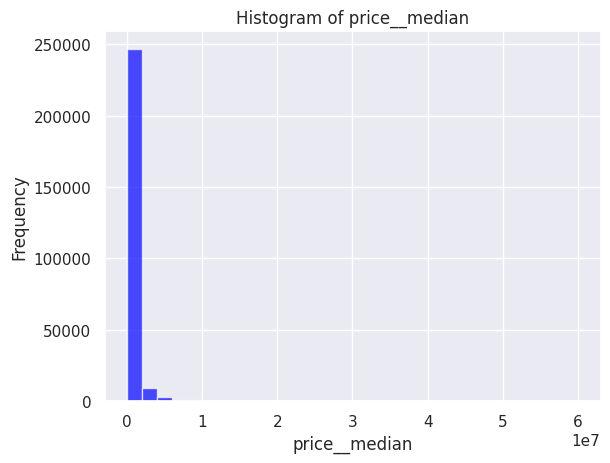

In [ ]:
# Plot the selected feature using histogram
plt.hist(extracted_features[feature_to_visualize], bins=30, color='blue', alpha=0.7)
plt.title(f'Histogram of {feature_to_visualize}')
plt.xlabel(feature_to_visualize)
plt.ylabel('Frequency')
plt.show()